In [1]:
# data manipulation libraries
import pandas as pd
import numpy as np

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt



## Exploring the Data

In [3]:
# exploring the data

users_data = pd.read_pickle("../data/users_data_final.pkl")

In [5]:
type(users_data)

pandas.core.frame.DataFrame

In [7]:
# preview the data

users_data.head(n = 3)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile


In [8]:
# check the data types

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [9]:
# summary statistics of the numerical data 

users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


### Feature Engineering: Numerical Data

In [14]:
# identifying numerical features

numerical_features = list(users_data.select_dtypes(['float64', 'int64', 'bool']).columns)
numerical_features

['number_transactions',
 'total_amount_usd',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit']

In [15]:
type(numerical_features)

list

In [17]:
# number of numerical features

len(numerical_features)

11

In [18]:
# identifying missing data

users_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [19]:
users_data.isnull().mean()

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

In [21]:
users_data_numerical = users_data.select_dtypes(['float64', 'int64', 'bool'])
type(users_data_numerical)

pandas.core.frame.DataFrame

In [23]:
users_data_numerical.isnull().sum()

number_transactions    9999
total_amount_usd       9999
age                       0
default                   0
housing                   0
loan                      0
duration                  0
campaign                  0
pdays                     0
previous                  0
term_deposit              0
dtype: int64

In [24]:
users_data_numerical.isnull().mean()

number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
default                0.000000
housing                0.000000
loan                   0.000000
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
term_deposit           0.000000
dtype: float64

In [25]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df

In [27]:
missing_df = identify_missing_data(users_data_numerical)
missing_df

,feature,percent_missing,data_type
0,number_transactions,22.12,float64
1,total_amount_usd,22.12,float64
2,age,0.00,int64
3,default,0.00,bool
4,housing,0.00,bool
5,loan,0.00,bool
6,duration,0.00,int64
7,campaign,0.00,int64
8,pdays,0.00,int64
9,previous,0.00,int64


In [28]:
missing_df[missing_df.percent_missing > 0]

,feature,percent_missing,data_type
0,number_transactions,22.12,float64
1,total_amount_usd,22.12,float64


In [31]:
users_data.number_transactions.fillna(0, inplace = True)

In [32]:
users_data.isnull().sum()

user_id                    0
number_transactions        0
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [33]:
users_data.total_amount_usd.fillna(0, inplace = True)

In [35]:
missing_df = identify_missing_data(users_data)
missing_df

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object
5,date_joined,0.07,datetime64[ns]
6,duration,0.00,int64
7,term_deposit,0.00,bool
8,previous,0.00,int64
9,pdays,0.00,int64


In [36]:
# identifying correlations in the data

users_data.corr()

# question: which features are have the strongest correlation?

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.053000,-0.006587,0.106674,0.023340,0.058259,-0.013408,0.018530,-0.025933,-0.016458,-0.041566
total_amount_usd,-0.053000,1.000000,0.082964,-0.056963,-0.058107,-0.073512,0.019620,-0.015878,0.004753,0.016606,0.044277
age,-0.006587,0.082964,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.106674,-0.056963,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.023340,-0.058107,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.058259,-0.073512,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.013408,0.019620,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.018530,-0.015878,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.025933,0.004753,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.016458,0.016606,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


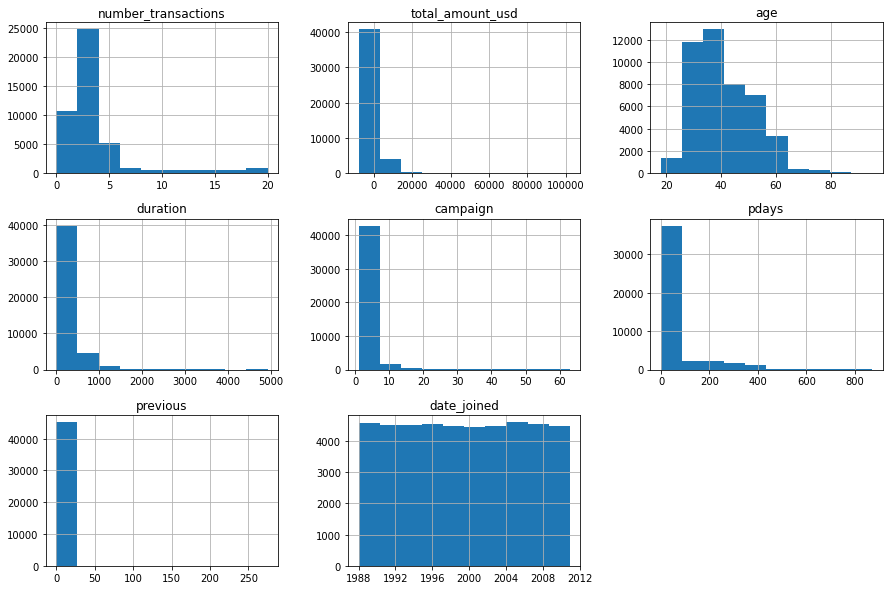

In [42]:
plt.rcParams["figure.figsize"] = (15,10)
users_data.hist();

- Plotting histograms has shown that all the numerical features are skewed, aside form date joined - we have seen no highly correlated features, the highest correlation was 0.45 between pdays and poutcome - we had two missing numerical features, which we replaced with 0

### Feature Engineering: Categorical Data

In [43]:
categorical_columns = list(users_data.select_dtypes(
                        ['object']).columns)
print("# of categorical columns:", len(categorical_columns))


# of categorical columns: 7


In [44]:
categorical_columns

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [46]:
# Distribution of the Job Variable

users_data.job.value_counts()

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [48]:
# Distribution of job with missing values

users_data.job.value_counts(dropna = False)

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

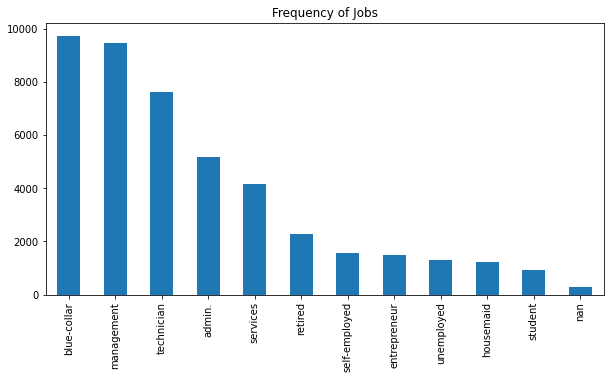

In [55]:
plt.rcParams["figure.figsize"] = (10,5)

users_data.job.value_counts(dropna = False).plot(kind = 'bar')
plt.title("Frequency of Jobs");

In [56]:
missing_value_df = identify_missing_data(users_data)
missing_value_df

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object
5,date_joined,0.07,datetime64[ns]
6,duration,0.00,int64
7,term_deposit,0.00,bool
8,previous,0.00,int64
9,pdays,0.00,int64


In [57]:
missing_value_df[missing_value_df.data_type == 'object']

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object
11,user_id,0.00,object
15,marital,0.00,object


In [58]:
missing_value_df[(missing_value_df.data_type == 'object') &
                (missing_value_df.percent_missing > 40)
                ]

,feature,percent_missing,data_type
0,poutcome,81.75,object


In [59]:
# drop the feature poutcome, because it has more than 40% missing data

users_data.drop(['poutcome'], axis = 1, inplace = True)

In [60]:
missing_value_df = identify_missing_data(users_data)
missing_value_df

,feature,percent_missing,data_type
0,contact,28.80,object
1,education,4.11,object
2,job,0.64,object
3,device,0.21,object
4,date_joined,0.07,datetime64[ns]
5,term_deposit,0.00,bool
6,previous,0.00,int64
7,pdays,0.00,int64
8,campaign,0.00,int64
9,duration,0.00,int64


In [61]:
users_data.job.fillna("Unknown", inplace = True)

In [63]:
users_data.job.value_counts(dropna = False)

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Unknown           288
Name: job, dtype: int64

In [ ]:
# Do in your own time - fill all categorical variables with unknowns